In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [38]:
data = np.loadtxt("./sphere-2tff.dat", skiprows=6, usecols=range(4))


In [39]:
time = data[:, 0]
pos = data[:, 1:]
r = np.linalg.norm(pos, axis=1)


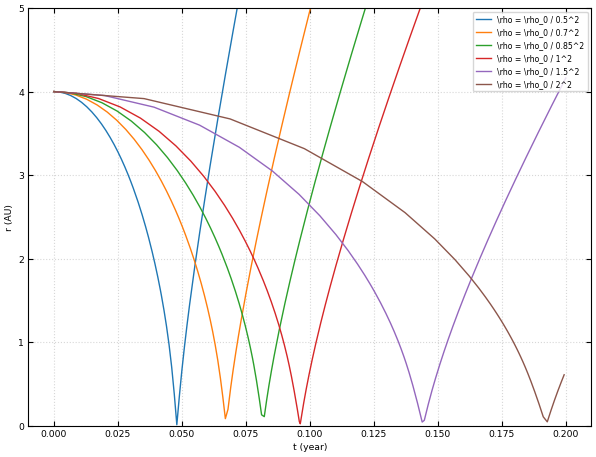

In [123]:
file_name = {r"\rho = \rho_0 / 0.5^2": "./sphere-0.5tff.dat", r"\rho = \rho_0 / 0.7^2": "./sphere-0.7tff.dat", r"\rho = \rho_0 / 0.85^2": "./sphere-0.85tff.dat",
             r"\rho = \rho_0 / 1^2": "./sphere-1tff.dat", r"\rho = \rho_0 / 1.5^2": "./sphere-1.5tff.dat", r"\rho = \rho_0 / 2^2": "./sphere-2tff.dat"}

for file in file_name:
    data = np.loadtxt(file_name[file], skiprows=6, usecols=range(4))
    time = data[:, 0]
    pos = data[:, 1:]
    r = np.linalg.norm(pos, axis=1)
    plt.plot(time, r, lw=1, label=file)

plt.ylim(0, 5)
plt.xlabel(r"t (year)")
plt.ylabel("r (AU)")

plt.legend(loc=1)
plt.grid()

# plt.savefig("tracer-particle.png", dpi=300)
plt.show()


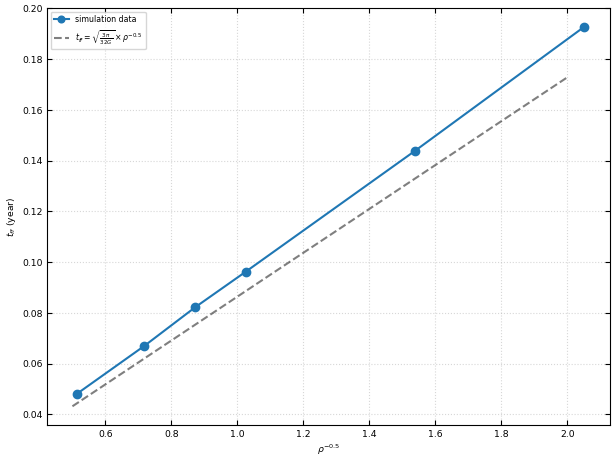

In [19]:
file_name = {r"\rho = \rho_0 / 0.5^2": "./sphere-0.5tff.dat", r"\rho = \rho_0 / 0.7^2": "./sphere-0.7tff.dat",
             r"\rho = \rho_0 / 0.85^2": "./sphere-0.85tff.dat", r"\rho = \rho_0 / 1^2": "./sphere-1tff.dat",
             r"\rho = \rho_0 / 1.5^2": "./sphere-1.5tff.dat", r"\rho = \rho_0 / 2^2": "./sphere-2tff.dat"}

rho = np.array([.5, .7, .85, 1., 1.5, 2])
rho = np.ones_like(rho) / (rho * rho) * 0.95
tff = np.array([])

for file in file_name:
    data = np.loadtxt(file_name[file], skiprows=6, usecols=range(4))
    time = data[:, 0]
    pos = data[:, 1:]
    r = np.linalg.norm(pos, axis=1)
    min_index = np.argmin(r)
    tff = np.append(tff, time[min_index])

x = np.linspace(0.5, 2, 30)
y = np.sqrt(3*np.pi / 32 / 39.47) * x

plt.plot(np.power(rho, -0.5), tff, "-o", label="simulation data")
plt.plot(x, y, 'k--', alpha=.5, label=r"$t_{ff}=\sqrt{\frac{3\pi}{32G}}\times \rho^{-0.5}$")

plt.xlabel(r"$\rho^{-0.5}$")
plt.ylabel(r"$t_{ff}$ (year)")
plt.legend()
plt.grid()

# plt.savefig("tff-relation.png", dpi=300)
plt.show()


In [145]:
data = np.loadtxt("./sphere-1tff.dat", skiprows=6, usecols=range(6*10+1))
time = data[:, 0]
pos = data[:, 1:]
r = np.zeros((len(pos), 10))

for i in range(10):
    r[:, i] = np.linalg.norm(pos[:, i*6:i*6+3], axis=1)

min_index = np.argmin(np.linalg.norm(r, axis=1))
min_index = np.argmin(r[:, 0]) + 2


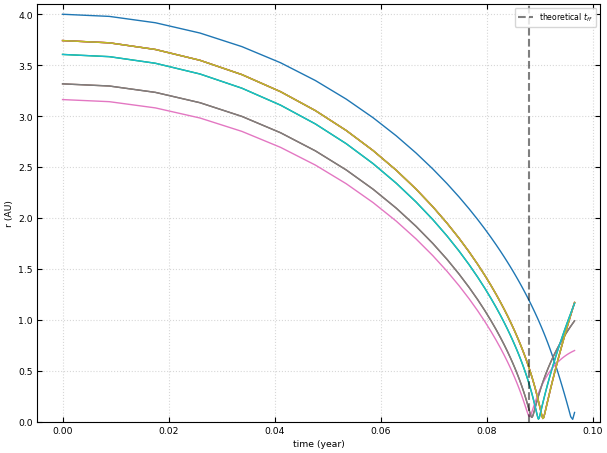

In [163]:
for i in range(10):
    plt.plot(time[:min_index], r[:min_index, i], lw=1)

plt.vlines(0.088, 0, 4.1, ls='--', colors='black', alpha=.5, label=r"theoretical $t_{ff}$")

plt.ylim(0, 4.1)
plt.xlabel("time (year)")
plt.ylabel("r (AU)")

plt.grid()
plt.legend()

plt.savefig("5-particles.png", dpi=300)
plt.show()


In [164]:
data = np.loadtxt("./sphere-1tff.dat", skiprows=6, max_rows=1)

In [176]:
pos = data[1:].reshape(257,6)
pos = pos[:, :3]

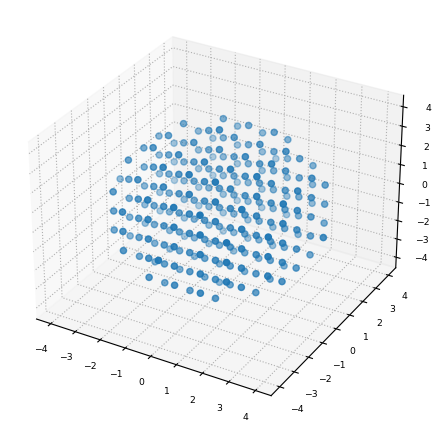

In [183]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
# ax.set_xlim3d(-3,3)
# ax.set_ylim3d(-3,3)
# ax.set_zlim3d(-3,3)
plt.show()


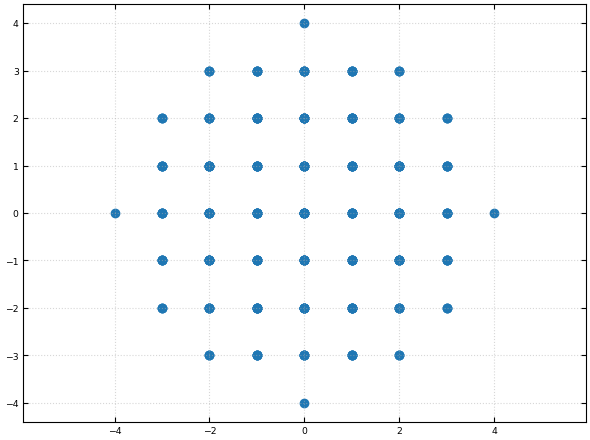

In [188]:
plt.axis("equal")

plt.scatter(pos[:, 0], pos[:, 1])

plt.grid()

plt.savefig("initial-projection.png", dpi=300)
plt.show()
